# Milestones 1 (Phase 2)

# I. Perkenalan

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Problems Statement :
- Perusahaan ingin memprediksi pelanggan yang berpotensi berhenti menggunakan produk yang ditawarkan, dengan tujuan untuk meminimalkan risiko kehilangan pelanggan.

Objective : 
- Untuk membuat sebuah model prediksi yang dapat memperkirakan pelanggan yang kemungkinan besar akan berhenti menggunakan produk yang ditawarkan oleh perusahaan

Latar belakang :
- Keberhasilan suatu perusahaan sangat bergantung pada jumlah pelanggan yang menggunakan produk atau layanan yang ditawarkan. Oleh karena itu, mempertahankan pelanggan menjadi hal yang sangat penting bagi kelangsungan bisnis perusahaan. Salah satu cara untuk mempertahankan pelanggan adalah dengan memprediksi pelanggan yang berpotensi berhenti menggunakan produk yang ditawarkan. Dengan memprediksi pelanggan yang berpotensi berhenti, perusahaan dapat mengambil tindakan yang tepat untuk mempertahankan pelanggan dan meminimalkan risiko kehilangan pelanggan. Melalui analisis data pada dataset yang tersedia, diharapkan dapat dikembangkan model prediksi yang akurat untuk memprediksi pelanggan yang berpotensi berhenti menggunakan produk yang ditawarkan, sehingga perusahaan dapat mengambil tindakan yang tepat untuk mempertahankan pelanggan dan meminimalkan risiko kehilangan pelanggan.

# II. Import Libraries

- Bagian ini hanya berisi library yang digunakan dalam project

In [87]:
# Package installer for python
!pip install feature_engine
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
# Library untuk memanggil dataset
import pandas as pd
import numpy as np

# Libraries untuk exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing data library
import phik
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer

# Model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

# Evaluasi
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,ConfusionMatrixDisplay,confusion_matrix

# Save model
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# III. Data Loading

- Bagian ini berisi proses persiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Loading Data dapat berupa pemberian nama baru untuk setiap kolom, pengecekan ukuran dataset, dll.

In [89]:
# Mengunggah file data
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn.csv


In [90]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--", "none", "?", "-",' ?', 'NaN', 'nan']
df = pd.read_csv('churn.csv', na_values = missing_values)

- Missing value pada dataset diganti menjadi nan value

In [91]:
# Function untuk menampilkan semua kolom pada dataset
pd.set_option("display.max.columns",None)

In [92]:
# Menampilkan 5 baris dataset teratas
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [93]:
# Menampilkan 5 baris dataset terakhir
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [94]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(37010, 22)

- Dari output diatas, dapat diinterpretasikan bahwa DataFrame memiliki 37.010 baris dan 22 kolom. Artinya, DataFrame terdiri dari 37.010 data (entri) yang masing-masing memiliki 22 fitur (kolom) yang berbeda. Informasi ini penting untuk membantu pemahaman tentang ukuran data yang digunakan dalam suatu analisis atau model pembelajaran mesin, serta dalam melakukan operasi data manipulasi, pemrosesan, dan visualisasi data yang sesuai.

In [95]:
# Memeriksa informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

        - Dataset terdiri dari 22 kolom, berikut penjelasan dari masing-masing kolom :
- user_id : ID dari pelanggan
- age : Usia dari pelanggan
- gender : Jenis kelamin dari pelanggan
- region_category : Wilayah tempat pelanggan tinggal
- membership_category : Kategori keanggotaan yang digunakan oleh pelanggan
- joining_date : Tanggal ketika pelanggan menjadi anggota
- joined_through_referral : Apakah pelanggan bergabung menggunakan kode atau ID referral
- preferred_offer_types : Jenis penawaran yang diinginkan oleh pelanggan
- medium_of_operation : Medium operasi yang digunakan oleh pelanggan untuk transaksi
- internet_option : Tipe layanan internet yang digunakan oleh pelanggan
- last_visit_time : Waktu terakhir pelanggan mengunjungi situs web
- days_since_last_login : Jumlah hari sejak pelanggan terakhir kali login ke situs web
- avg_time_spent : Rata-rata waktu yang dihabiskan oleh pelanggan di situs web
- avg_transaction_value : Nilai transaksi rata-rata dari pelanggan
- avg_frequency_login_days : Jumlah kali pelanggan login ke situs web
- points_in_wallet : Poin yang diberikan kepada pelanggan pada setiap transaksi
- used_special_discount : Apakah pelanggan menggunakan diskon khusus yang ditawarkan
- offer_application_preference : Apakah pelanggan lebih memilih penawaran
- past_complaint : Apakah pelanggan pernah mengajukan keluhan
- complaint_status : Apakah keluhan yang diajukan oleh pelanggan telah diselesaikan
- feedback : Umpan balik yang diberikan oleh pelanggan
- churn_risk_score : Skor churn (0: Tidak churn, 1: Churn)

In [96]:
# Mengubah dtype pada joining_date dan last_visit_time menjadi datetime64[ns]
df[['joining_date', 'last_visit_time']] = df[['joining_date', 'last_visit_time']].apply(pd.to_datetime)

In [97]:
# Mencari dataset yang duplikasi
df[df.duplicated()].shape

(18, 22)

- Berdasarkan hasil di atas menunjukkan jumlah baris dan kolom dari dataset dalam DataFrame yang memiliki duplikat atau data yang sama persis.
- Hasil output menunjukkan bahwa terdapat 18 baris dan 22 kolom dalam dataset yang ditemukan sebagai duplikat.
- Informasi ini dapat membantu dalam melakukan pembersihan data dengan menghapus atau menggabungkan data duplikat yang tidak diperlukan.

In [98]:
# Menampilkan letak dataset yang terduplikasi
df[df.duplicated()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,2023-03-31 12:47:12,16,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,2023-03-31 18:16:03,8,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
11478,9ba8bf4d1e50100c,47,F,Town,Gold Membership,2016-07-10,No,Credit/Debit Card Offers,Both,Fiber_Optic,2023-03-31 02:13:06,-999,497.320000,15082.13,11.0,730.340000,No,Yes,Yes,Unsolved,No reason specified,0
12589,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,2023-03-31 17:33:22,-999,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
14840,859745861c61ebef,35,M,City,Silver Membership,2016-03-27,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,2023-03-31 03:44:26,23,1064.763315,42483.66,28.0,702.110000,No,Yes,Yes,Solved in Follow-up,Too many ads,1
16165,9c8c2db425854d5e,54,M,NaN,Platinum Membership,2015-09-28,Yes,Without Offers,Smartphone,Fiber_Optic,2023-03-31 05:39:46,12,1267.660000,38244.30,18.0,741.640000,No,Yes,No,Not Applicable,No reason specified,0
22341,9186d6f284e4ac5b,59,M,Town,Basic Membership,2015-01-07,NaN,Credit/Debit Card Offers,Desktop,Mobile_Data,2023-03-31 14:43:07,16,266.190000,48632.63,19.0,654.590000,Yes,Yes,Yes,Unsolved,Poor Website,1
24693,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,2023-03-31 17:05:33,18,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
26214,a594feaffc78b36b,58,M,City,Basic Membership,2017-04-01,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,2023-03-31 05:23:02,19,0.000000,7614.88,29.0,202.317926,Yes,No,No,Not Applicable,Poor Customer Service,1
26687,9d20f093164c98a3,35,M,NaN,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,2023-03-31 17:58:45,4,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0


In [99]:
# Menghapus dataset yang terduplikasi
df.drop_duplicates(inplace=True)

In [100]:
# Menampilkan kembali dataset yang terduplikasi 
df[df.duplicated()].shape

(0, 22)

- Tidak terdapat adanya dataset yang terdupliksi lagi setelah data duplikasi dihandling dengan cara di drop/dihapus
- Data duplikat pada umumnya perlu dihapus atau di-drop dari dataset karena hal ini dapat mempengaruhi kinerja model dalam belajar dan menghasilkan output yang tidak akurat.

In [101]:
# Mencari missing value pada setiap kolom dalam dataset
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

- Berdasarkan hasil di atas, dapat dilihat bahwa kolom 'gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', dan 'medium_of_operation' memiliki  missing value. Jumlah missing value pada setiap kolom tersebut adalah 59, 5428, 5438, 288, dan 5393.
- Hal ini menunjukkan bahwa data pada kolom tersebut perlu diproses lebih lanjut untuk mengisi missing value atau menghapus baris yang memiliki missing value agar tidak mengganggu kualitas model yang akan dibangun. 

In [102]:
# Melihat persentase missing value pada masing-masing kolom dan menghitung total persentase missing values pada dataset
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

total_missing = df.isna().sum().sum()
percentage_missing = (total_missing / (df.shape[0] * df.shape[1])) * 100
print(f"Persentase keseluruhan missing values di DataFrame adalah: {percentage_missing:.2f}%")

user_id                          0.000000
age                              0.000000
gender                           0.159494
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral         14.700476
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 0.000000
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64
Persentase keseluruhan missing values di DataFrame adalah: 2.

- Persentase missing values dari kolom gender dan preferred_offer_types secara berturut-turut yaitu 0.159494 dan 0.778547, dikarenakan persentasenya tidak mencapai 5% maka akan dihandling dengan cara di hapus/drop missing values untuk kedua kolom tersebut.
- Sedangkan untuk kolom region_category , joined_through_referral , dan medium_of_operation handling missing values akan menggunakan cara imputasi/capping (SimpleImputer(strategy='most_frequent') dikarenakan nilai yang hilang/missing valuesnya lebih besar dari 5% dan merupakan data kategorikal, dimana nilai missing valuesnya secara berturut-turut yaitu 14.673443,14.700476,14.578828.
- Cara kerja dari SimpleImputer dengan strategi most_frequent adalah dengan mengganti nilai yang hilang dari masing-masing kolom dengan nilai yang paling sering muncul atau moda dari masing-masing kolom. Strategi ini cocok digunakan untuk mengisi missing value pada data kategorikal.

In [103]:
# Inisiasi SimpleImputer dengan strategi 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

In [104]:
# Menyalin dataframe ke variabel baru  
nba = df.copy()

In [105]:
# Menghapus baris pada kolom gender dan kolom preferred_offer_types yang terdapat missing value 
nba.dropna(subset=['gender'], inplace=True)
nba.dropna(subset=['preferred_offer_types'], inplace=True)

In [106]:
# Melakukan imputasi pada kolom region_category, joined_through_referral, dan medium_of_operation menggunakan SimpleImputer
nba[['region_category', 'joined_through_referral', 'medium_of_operation']] = imputer.fit_transform(nba[['region_category', 'joined_through_referral', 'medium_of_operation']])

In [107]:
# Melihat missing values pada masing-masing kolom
print(nba.isnull().sum())

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64


- Setelah missing values di handling dengan cara di trimming atau di capping maka tidak ada lagi missing values pada dataset

# IV. Exploratory Data Analysis (EDA)

- Bagian ini berisi eksplorasi data pada dataset di atas dengan menggunakan query, pengelompokan, visualisasi sederhana, dan sebagainya.
- Dikutip dari medium.com, Exploratory Data Analysis (EDA) merupakan bagian dari proses data science. EDA sangat penting sebelum melakukan feature engineering dan modeling karena pada tahap ini kita harus memahami data terlebih dahulu.
- Untuk EDA, saya sajikan beberapa visualisasi histogram dan visualisasi untuk informasi data kategorik berupa diagram batang dan diagram lingkaran.

In [108]:
# Membuat fungsi digunakan untuk menampilkan nilai unik atau unique value dari setiap kolom dalam dataframe 
for column in nba.columns:
    print(f"{column}: ")
    print("")
    print(nba[column].unique())
    print("")

user_id: 

['9f420209e7d129f3' 'ac6e97806267549e' 'a6aa19b1580eed4e' ...
 '9329a6297407334a' 'a4403ddda8fcf9f3' '93b5d0330d24fa15']

age: 

[29 50 26 63 64 35 43 15 49 53 33 24 36 23 40 27 48 62 28 59 19 18 47 32
 57 52 61 12 30 22 41 58 60 11 17 14 51 39 56 34 16 21 10 55 13 25 46 20
 44 31 38 37 42 45 54]

gender: 

['F' 'M']

region_category: 

['Town' 'City' 'Village']

membership_category: 

['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']

joining_date: 

['2017-04-05T00:00:00.000000000' '2017-03-31T00:00:00.000000000'
 '2017-02-11T00:00:00.000000000' ... '2015-04-08T00:00:00.000000000'
 '2015-08-06T00:00:00.000000000' '2015-01-20T00:00:00.000000000']

joined_through_referral: 

['Yes' 'No']

preferred_offer_types: 

['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons']

medium_of_operation: 

['Desktop' 'Smartphone' 'Both']

internet_option: 

['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']

last_visit_t

In [109]:
# Menghitung jumlah pelanggan berdasarkan churn_risk_score
nba.churn_risk_score.value_counts().sort_values(ascending = False)

1    19827
0    16819
Name: churn_risk_score, dtype: int64

- Jumlah data untuk nilai churn_risk_score 1 terdapat sebanyak 19833, sedangkan untuk nilai 0 terdapat sebanyak 16831. Hal ini menunjukkan bahwa lebih banyak pelanggan yang memiliki nilai churn_risk_score 1 dibandingkan dengan pelanggan yang memiliki nilai churn_risk_score 0.
- Secara umum, nilai churn_risk_score yang tinggi (1) menunjukkan bahwa pelanggan memiliki risiko yang lebih tinggi untuk berhenti berlangganan layanan, sedangkan nilai churn_risk_score yang rendah (0) menunjukkan bahwa pelanggan memiliki risiko yang lebih rendah untuk berhenti berlangganan.

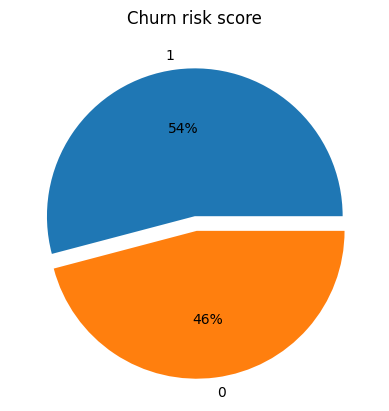

In [110]:
# Menghitung persentase customer churn
plt.pie(nba['churn_risk_score'].value_counts(),labels = [1,0], autopct='%.0f%%', explode=[0,0.1])
plt.title('Churn risk score')
plt.show()

- Berdasarkan hasil grafik di atas, dapat disimpulkan bahwa: Skor risiko customer churn (1) mewakili mayoritas dataset, dengan persentase sebesar 54%. Sedangkan untuk skor risiko customer yang tidak churn (0) mewakili minoritas dataset, dengan persentase sebesar 46%.
- Hal ini menunjukkan bahwa proporsi pelanggan yang lebih tinggi yang berisiko churn dibandingkan dengan yang tidak. Penting bagi bisnis untuk mengidentifikasi dan memahami faktor-faktor yang berkontribusi terhadap skor risiko churn yang lebih tinggi untuk mengembangkan strategi yang efektif untuk mempertahankan pelanggan dan mengurangi churn.

In [111]:
# Mengelompokkan kolom membership_category dengan churn_risk_score untuk dicari nilai rata-ratanya
nba.groupby(['membership_category'])[['churn_risk_score']].mean().T

membership_category,Basic Membership,Gold Membership,No Membership,Platinum Membership,Premium Membership,Silver Membership
churn_risk_score,0.967442,0.370766,0.970611,0.0,0.0,0.427607


    - Berdasarkan hasil tersebut, dapat dilihat rata-rata churn_risk_score (tingkat risiko pelanggan berhenti berlangganan) untuk tiap kategori keanggotaan (membership_category) sbb : 

- Dapat dilihat bahwa kategori keanggotaan "Platinum Membership" dan "Premium Membership" memiliki nilai mean churn_risk_score sebesar 0, yang berarti pelanggan dalam kategori keanggotaan tersebut cenderung tidak berhenti berlangganan.
- Sementara itu, untuk kategori keanggotaan "Basic Membership", dan "No Membership" memiliki nilai mean churn_risk_score yang sangat tinggi, yaitu di atas 0.9. Hal ini menunjukkan bahwa pelanggan dalam kategori keanggotaan tersebut memiliki risiko yang relatif tinggi untuk berhenti berlangganan.
- Sedangkan kategori keanggotaan "Silver Membership" dan "Gold Membership" memiliki nilai churn_risk_score yang sedikit lebih rendah dibandingkan dengan kategori-kategori lainnya, namun tetap di atas 0.3. Hal ini menunjukkan bahwa pelanggan dalam kategori keanggotaan tersebut memiliki risiko yang cukup signifikan untuk berhenti berlangganan.

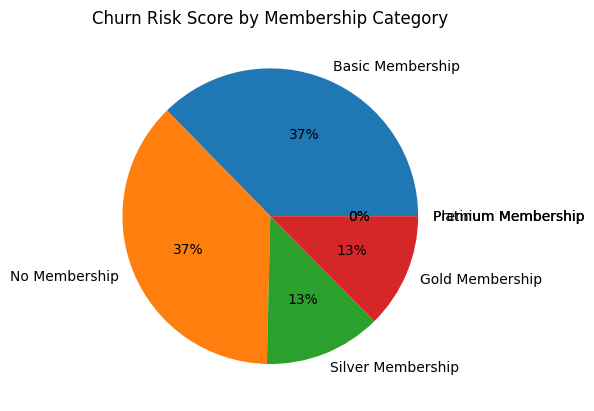

In [112]:
# Menghitung nilai persentase membership_category dari churn_risk_score
cros = pd.crosstab(nba.membership_category,nba.churn_risk_score).sort_values(by = 1, ascending = False)
plt.pie(cros.iloc[:,1],labels = cros.index.tolist(), autopct='%.0f%%', labeldistance=1.1)
plt.title('Churn Risk Score by Membership Category')
plt.show()

    - Berdasarkan hasil tersebut, dapat dilihat persentase tiap kategori keanggotaan (membership_category) dalam hal tingkat risiko pelanggan berhenti berlangganan (churn_risk_score).
- Dapat dilihat bahwa kategori keanggotaan "Basic Membership" dan "No Membership" memiliki persentase churn_risk_score yang sama tinggi, yaitu sebesar 37%. Hal ini menunjukkan bahwa sekitar 37% dari pelanggan dalam kedua kategori keanggotaan tersebut memiliki risiko yang relatif tinggi untuk berhenti berlangganan.
- Sementara itu, kategori keanggotaan "Gold Membership" dan "Silver Membership" memiliki persentase churn_risk_score yang sama, yaitu sebesar 13%. Ini menunjukkan bahwa sekitar 13% dari pelanggan dalam kedua kategori keanggotaan tersebut memiliki risiko yang cukup signifikan untuk berhenti berlangganan.
- Kategori keanggotaan "Platinum Membership" dan "Premium Membership" memiliki churn_risk_score sebesar 0%, yang berarti tidak ada pelanggan dalam kategori keanggotaan tersebut yang memiliki risiko untuk berhenti berlangganan.

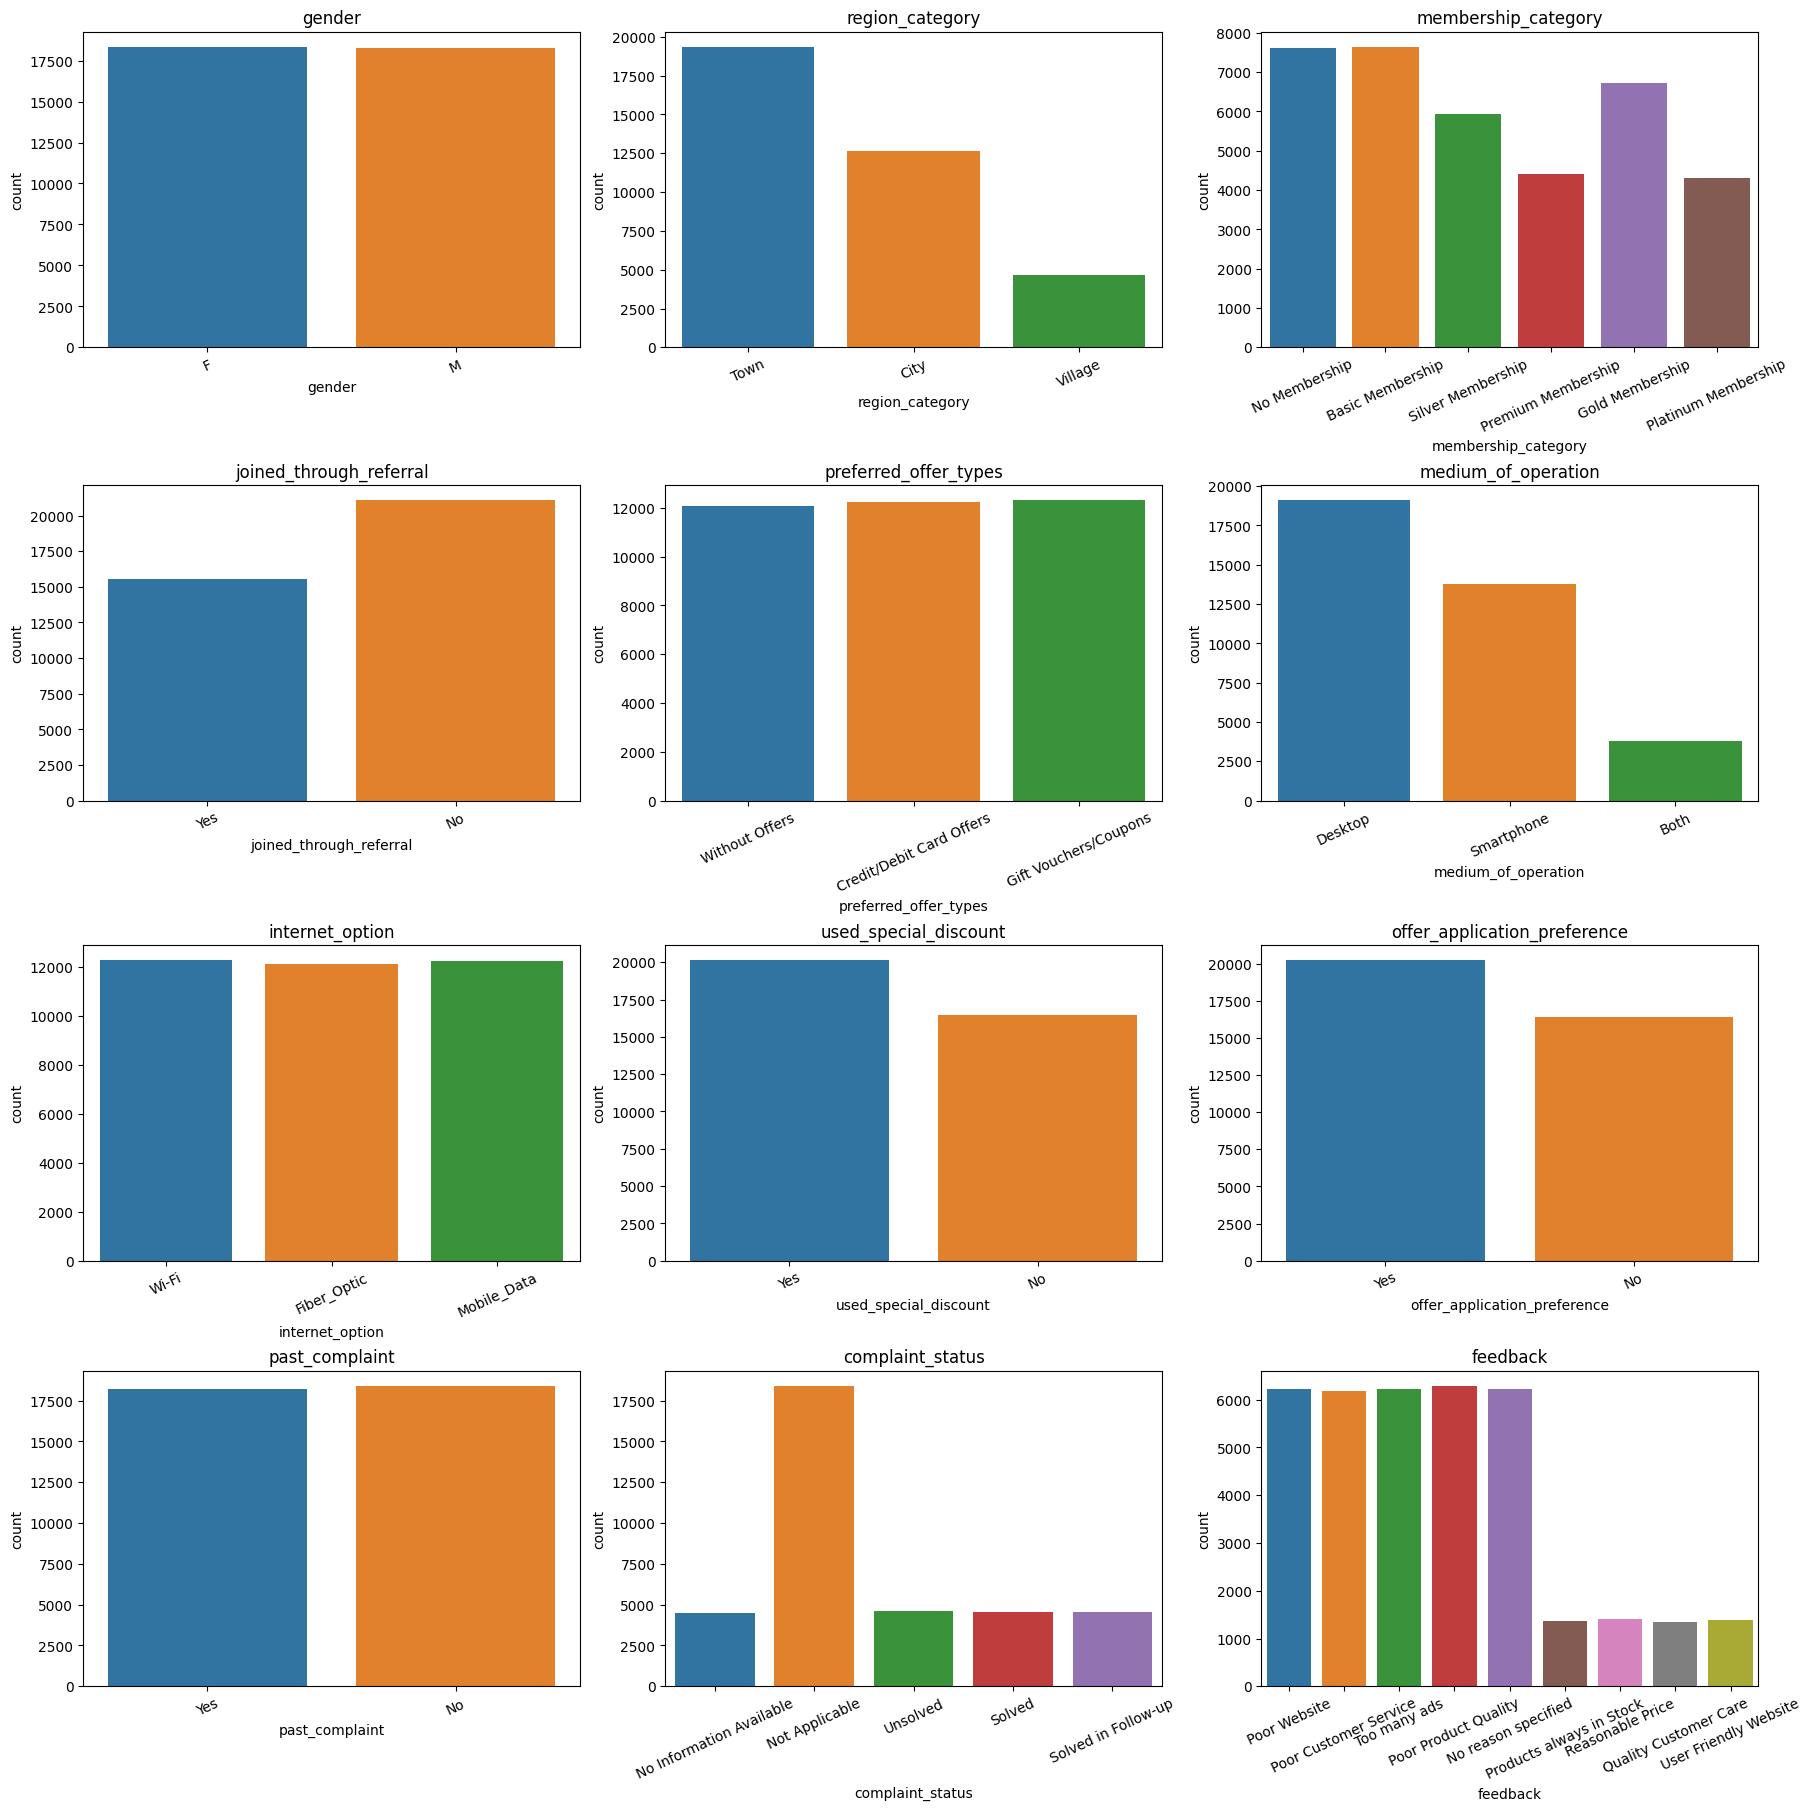

In [113]:
# membuat list dari variabel kategori yang ingin divisualisasikan
cat = ['gender', 'region_category', 'membership_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'used_special_discount', 'offer_application_preference', 'past_complaint',
       'complaint_status', 'feedback']

# membuat subplot grid 4x3 dengan ukuran figure 18x18
fig, axes = plt.subplots(4, 3, figsize=(18, 18), constrained_layout=True)

# melakukan loop pada setiap variabel kategori dan subplot yang sesuai
for col, ax in zip(cat, axes.flat):
    sns.countplot(data=nba, x=col, ax=ax)
    ax.tick_params(axis='x', rotation=25)
    ax.set_title(col)

# menonaktifkan plot-grid pada seluruh subplot yang tidak terpakai
for ax in axes.flat[len(cat):]: 
    ax.set_axis_off()


- Berdasarkan hasil visualisasi di atas menjelaskan distribusi setiap variabel kategori dalam dataset "churn" agar dapat memberikan informasi mengenai frekuensi kemunculan pada setiap kategori variabel dan dapat membantu dalam pemahaman pola data.

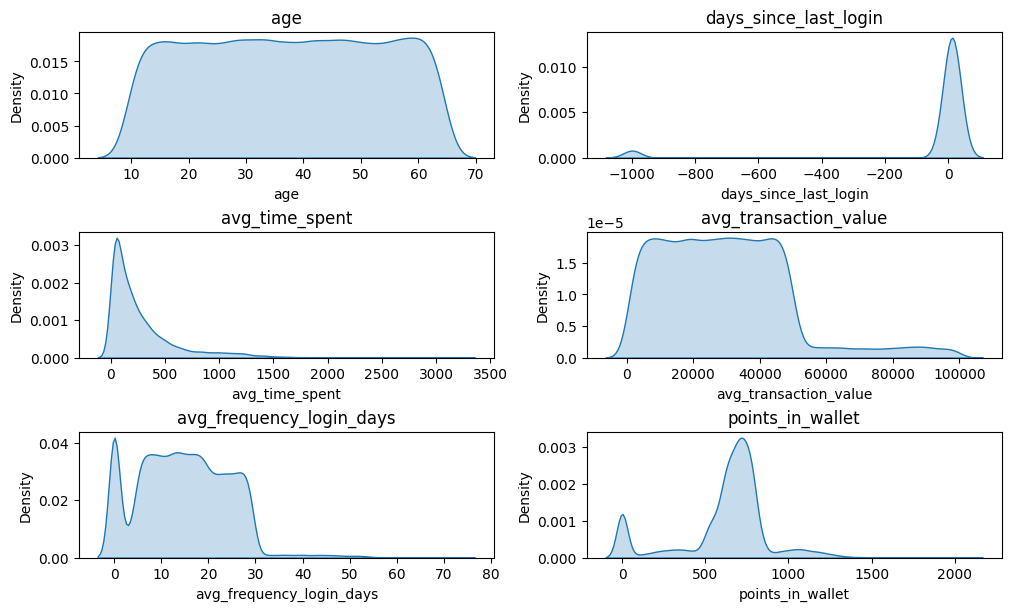

In [114]:
# membuat list dari variabel numerik yang ingin divisualisasikan
num = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

# membuat subplot dengan ukuran figure 10 x 6
fig, axes = plt.subplots(3,2, figsize=(10, 6), constrained_layout=True)

# melakukan loop pada setiap variabel numerik dan subplot yang sesuai
for col, ax in zip(num, axes.flat):
    sns.kdeplot(data=nba, x=col, ax=ax, shade=True)
    ax.set_title(col)

- Untuk setiap variabel numerik, plot akan menampilkan kerapatan distribusi data dengan sumbu x adalah nilai variabel numerik, sedangkan sumbu y adalah jumlah data dalam setiap range nilai variabel.

In [115]:
# Mengelompokkan region_category dengan churn_risk_score untuk dilihat nilai rata-ratanya
nba.groupby(['region_category'])[['churn_risk_score']].mean().T

region_category,City,Town,Village
churn_risk_score,0.546751,0.54407,0.512986


- Hasil diatas menunjukkan rata-rata nilai churn risk score untuk setiap kategori wilayah. Dapat dilihat bahwa Village memiliki nilai rata-rata churn risk score yang lebih rendah dibandingkan dengan City dan Town. 
- Melihat nilai rata-rata churn risk score berdasarkan kategori wilayah dapat memberikan wawasan (insight) kepada bisnis mengenai bagaimana kategori wilayah tersebut dapat mempengaruhi tingkat risiko churn pada pelanggan. Dengan mengetahui perbedaan nilai rata-rata churn risk score pada masing-masing kategori wilayah, bisnis dapat mengevaluasi strategi pemasaran dan pengelolaan pelanggan untuk setiap wilayah yang berbeda.

In [116]:
# Melihat jumlah nilai region_category dari masing-masing category(wilayah)
nba.region_category.value_counts().sort_values(ascending = False)

Town       19367
City       12620
Village     4659
Name: region_category, dtype: int64

- Dari hasil di atas, dapat diketahui bahwa terdapat tiga nilai unik pada kolom "region_category", yaitu "Town", "City", dan "Village". Nilai yang jumlahnya paling banyak adalah "Town" dengan jumlah sebanyak 19,367, diikuti oleh "City" dengan jumlah sebanyak 12,620, dan "Village" dengan jumlah sebanyak 4,659. Dari hasil tersebut dapat dilihat distribusi customer pada masing-masing kategori region, yang dapat memberikan insight untuk memahami preferensi customer terhadap layanan pada setiap kategori region

In [117]:
# Mengelompokan region_category dengan churn_risk_score untuk dilihat value_counts masing-masing region
nba.groupby(['region_category'])[['churn_risk_score']].value_counts()

region_category  churn_risk_score
City             1                    6900
                 0                    5720
Town             1                   10537
                 0                    8830
Village          1                    2390
                 0                    2269
dtype: int64

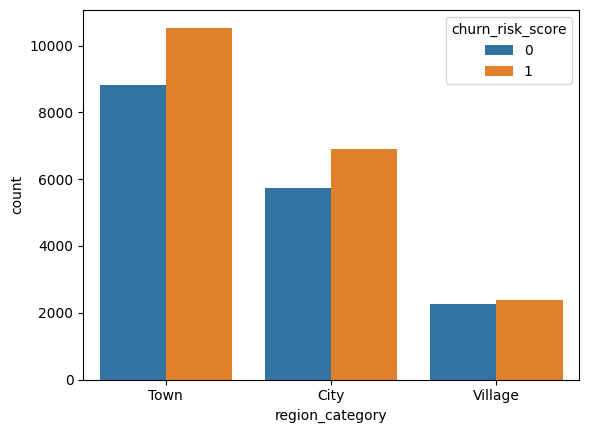

In [118]:
# Memvisualisasikan region_category dengan churn_risk_score
sns.countplot(data = nba, x = 'region_category', hue = 'churn_risk_score')
plt.show()

Dari hasil tersebut, dapat disimpulkan bahwa: 
- City memiliki jumlah pelanggan terbanyak, dengan churn_risk_score 0 lebih sedikit dibandingkan churn_risk_score 1.
- Town juga memiliki jumlah pelanggan yang banyak, dengan churn_risk_score 1 dan 0 hampir sama.
- Village memiliki jumlah pelanggan terkecil, dengan churn_risk_score 1 lebih sedikit dibandingkan churn_risk_score 0.

In [119]:
# Mengelompokan membership_category dengan points_in_wallet
nba.groupby(['membership_category'])[['points_in_wallet']].mean().sort_values(by='points_in_wallet', ascending=False)


,points_in_wallet
membership_category,
Platinum Membership,688.952893
Premium Membership,686.753710
Gold Membership,657.508787
Silver Membership,645.988049
Basic Membership,564.432673
No Membership,562.358914


- Kategori keanggotaan Platinum memiliki rata-rata poin tertinggi dengan nilai sebesar 688.98, diikuti oleh keanggotaan Premium dan Gold. Sedangkan kategori keanggotaan Basic dan No memiliki rata-rata poin yang lebih rendah.

In [120]:
# Mengelompokan membership_category dengan avg_transaction_value
nba.groupby(['membership_category'])[['avg_transaction_value']].mean().sort_values(by='avg_transaction_value', ascending=False)


,avg_transaction_value
membership_category,
Premium Membership,35336.102697
Platinum Membership,35297.868096
Gold Membership,31085.800108
Silver Membership,28568.265505
No Membership,25372.034608
Basic Membership,25236.682228


- Dari hasil tersebut dapat dilihat bahwa rata-rata nilai transaksi tertinggi dimiliki oleh pelanggan dengan membership category Premium dan Platinum, diikuti oleh Gold dan Silver membership. Sementara pelanggan dengan membership category No dan Basic memiliki rata-rata nilai transaksi yang lebih rendah. 

# -Korelasi-

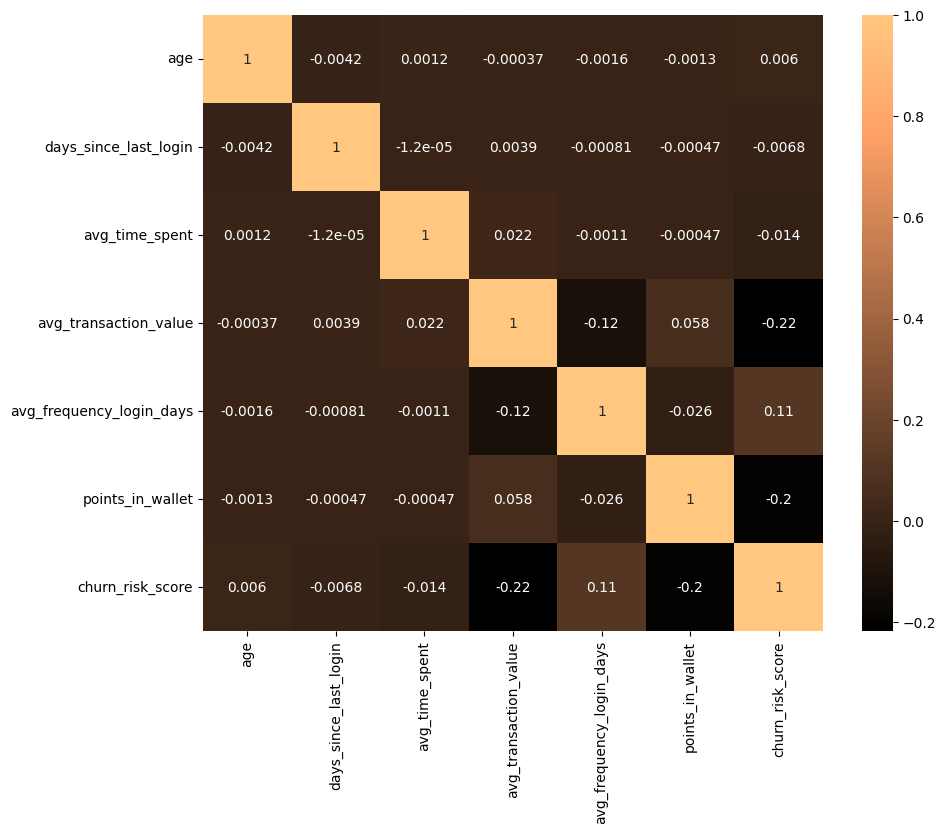

In [121]:
# Heatmap korelasi antara target dengan fitur 
cor = nba.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor, cmap = 'copper', annot = True)
plt.show()

In [122]:
# Menghitung korelasi antar semua kolom numerik pada dataframe
nba.corr().nlargest(7, 'churn_risk_score')['churn_risk_score']

churn_risk_score            1.000000
avg_frequency_login_days    0.114466
age                         0.006048
days_since_last_login      -0.006804
avg_time_spent             -0.013594
points_in_wallet           -0.200662
avg_transaction_value      -0.217844
Name: churn_risk_score, dtype: float64

In [123]:
# Menghapus kolom yang tidak diperlukan
nba.drop(columns=['user_id', 'joining_date', 'age', 'gender','last_visit_time','days_since_last_login'], inplace=True)

In [124]:
# Menghitung korelasi antar semua kolom pada dataframe dengan function phik_matrix
nba.phik_matrix().nlargest(10, 'churn_risk_score')['churn_risk_score']

interval columns not set, guessing: ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.942304
feedback                        0.455936
points_in_wallet                0.449527
avg_transaction_value           0.408894
avg_frequency_login_days        0.165866
joined_through_referral         0.043545
offer_application_preference    0.029310
preferred_offer_types           0.025768
avg_time_spent                  0.025319
Name: churn_risk_score, dtype: float64

- Hasil korelasi menunjukkan hubungan antara setiap variabel dalam dataset dengan variabel target, yaitu churn_risk_score. Variabel membership_category memiliki korelasi positif yang sangat kuat dengan churn_risk_score, yaitu 0.942304. Variabel-feedback, points_in_wallet, dan avg_transaction_value juga memiliki korelasi positif yang signifikan dengan churn_risk_score, yaitu masing-masing 0.455936, 0.449527, dan 0.408894.
- Artinya, semakin tinggi nilai variabel-variabel tersebut, semakin tinggi kemungkinan customer akan churn. Maka saya akan menggunakan keempat variabel tersebut yang memiliki nilai korelasi tertinggi dengan target

# V. Feature Engineering

- Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [125]:
# Memasukkan fitur-fitur yang terpilih ke dalam sebuah variabel baru
nba2 = nba.iloc[:,[1,7,9,14,15]]
nba2.head()

,membership_category,avg_transaction_value,points_in_wallet,feedback,churn_risk_score
0,No Membership,38604.69,627.48,Poor Website,1
1,Basic Membership,7665.66,575.97,Poor Customer Service,1
2,Silver Membership,37671.69,767.93,Too many ads,0
3,No Membership,15678.14,590.22,Too many ads,1
4,Silver Membership,8422.68,722.04,Poor Product Quality,0


In [126]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [127]:
# Menghitung VIF pada setiap variabel numerik yang dipilih sebagai fitur untuk memeriksa multikolinieritas
jk = nba2.iloc[:,[1,2]]
calc_vif(jk)

,variables,VIF
0,avg_transaction_value,2.523297
1,points_in_wallet,2.523297


- VIF < 5, tidak ada korelasi antara variabel independen dengan variabel lainnya
- VIF yang melebihi 5 atau 10 menunjukkan multikolinearitas yang tinggi antara variabel independen ini dengan variabel lainnya
- Nilai VIF akan semakin besar jika terdapat korelasi yang semakin besar diantara variabel bebas (sumber :http://eprints.uny.ac.id/2368/1/SKRIPSI_Agriska.pdf)

# -Data Splitting-

In [128]:
# Split Fitur dan Target
X = nba2.drop('churn_risk_score', axis=1)
y = nba2['churn_risk_score']

In [129]:
# Split Train, Test, Validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [130]:
# Membuat looping untuk melihat jumlah shape pada masing" data
for i in [X_train, X_test, X_val, y_train, y_test, y_val]:
    print(i.shape)

(23452, 4)
(7330, 4)
(5864, 4)
(23452,)
(7330,)
(5864,)


# -Handling Outliers-

In [131]:
# Membuat function untuk handling outlier
def diagnostic_plots(nba, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(nba[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=nba[variable])
    plt.title('Boxplot')

    plt.show()

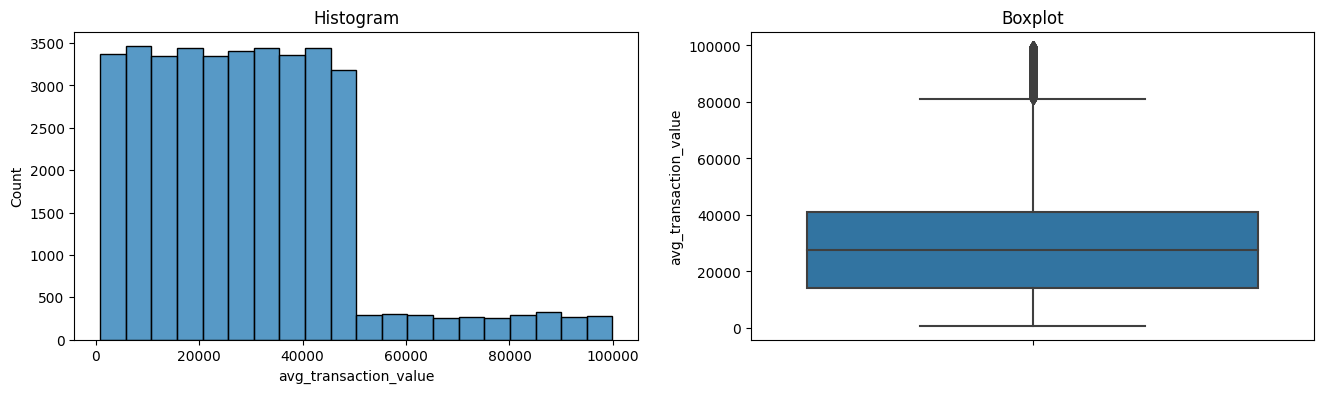


Skewness Value avg_transaction_value :  1.0101992085262388


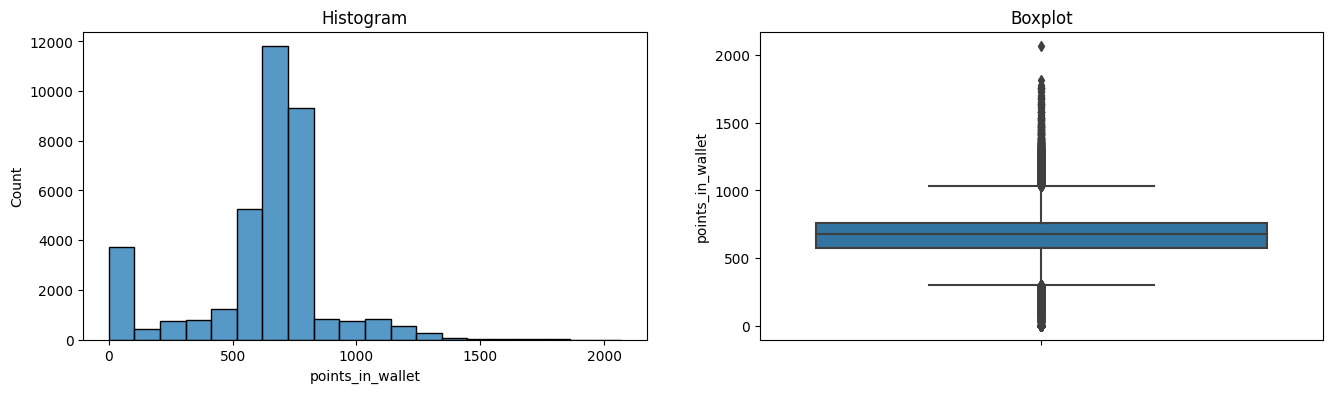


Skewness Value points_in_wallet :  -0.7746135523263624


In [132]:
# Cek skew dan outlier pada dataset yang menjadi fitur dengan boxplot dan histogram

diagnostic_plots(nba, 'avg_transaction_value')
print('\nSkewness Value avg_transaction_value : ', nba['avg_transaction_value'].skew())

diagnostic_plots(nba, 'points_in_wallet')
print('\nSkewness Value points_in_wallet : ', nba['points_in_wallet'].skew())

- Dari histogram di atas dapat dilihat bahwa distribusi pada avg_transaction_value dan points_in_wallet terdistribusi tidak normal dimana nilai skewness secara berturut-turut 1.0101992085262388, -0.7746135523263624 dan terlihat adanya right-end outliers pada boxplot.
- Handling outliers dengan Tukey's Rule (IQR) karena data terdistribusi tidak normal

In [133]:
# Menghitung outliers pada kolom pregnancies dengan IQR
Q1 = nba['avg_transaction_value'].quantile(.25)
Q3 = nba['avg_transaction_value'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['avg_transaction_value'] <= lower) | (nba['avg_transaction_value'] >= upper)]

print('Persentase outliers pada kolom avg_transaction_value: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom avg_transaction_value:  0.0 %
Upper boundary:  120908.245
Lower boundary:  -65869.9725


In [134]:
# Menghitung outliers pada kolom pregnancies dengan IQR
Q1 = nba['points_in_wallet'].quantile(.25)
Q3 = nba['points_in_wallet'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['points_in_wallet'] <= lower) | (nba['points_in_wallet'] >= upper)]

print('Persentase outliers pada kolom points_in_wallet: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom points_in_wallet:  10.161656574394463 %
Upper boundary:  1305.5124999999994
Lower boundary:  25.737500000000637


- Persentase outliers = 10 %, sehingga akan dihandling dengan metode IQR menggunakan Winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

# -Pipeline-

In [135]:
# Pipeline untuk handling outliers pada dataset
num_pipeline = Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['avg_transaction_value', 'points_in_wallet']])

In [136]:
# Pipeline untuk kolom kategori pada dataset
cat_pipeline = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder())
    ])

cat_tr = cat_pipeline.fit_transform(X_train[['feedback']])

In [137]:
# Membuat variabel baru dengan mengurutkan membership berdasarkan poin yang dikumpulkan
membership_level = ['No Membership', 'Basic Membership', 'Silver Membership','Gold Membership','Premium Membership','Platinum Membership']

cat_1_pipeline = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('ordinal_enc', OrdinalEncoder(categories=[membership_level]))
    ])

cat_1_tr = cat_1_pipeline.fit_transform(X_train[['membership_category']])

In [138]:
# Melakukan transformasi data pada dataset 
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['avg_transaction_value', 'points_in_wallet']),
        ("cat", cat_pipeline, ['feedback']),
        ("cat1", cat_1_pipeline, ['membership_category'])
    ])
train_tr = full_pipeline.fit_transform(X_train)

In [139]:
# Melakukan transformasi data pada data test
test_tr = full_pipeline.transform(X_test)

In [140]:
# Melakukan transformasi data pada data validasi
val_tr = full_pipeline.transform(X_val)

# VI. Model Definition

#### -Penjelasan algoritma-algoritma model yang digunakan - ####
- Artificial Neural Network (ANN) adalah sebuah model machine learning yang terinspirasi oleh struktur jaringan saraf otak manusia dan digunakan untuk memproses data. ANN terdiri dari beberapa lapisan (layer) yang saling terhubung, dimana setiap lapisan terdiri dari beberapa neuron. Setiap neuron menerima input, melakukan operasi matematika pada input tersebut, dan menghasilkan output yang akan menjadi input bagi neuron selanjutnya. Output dari neuron terakhir digunakan untuk melakukan klasifikasi atau regresi pada data.
- Sequential API digunakan untuk membangun model ANN dengan susunan layer yang sederhana, dimana setiap layer hanya memiliki satu input dan satu output. Dalam Sequential API, layer ditambahkan secara berurutan dan setiap layer terhubung dengan layer sebelum dan sesudahnya. Kelebihan Sequential API adalah kemudahan dalam pembuatan model ANN dengan susunan layer yang sederhana. Selain itu, Sequential API juga lebih mudah dipahami dan digunakan bagi pemula. Namun, kekurangan dari Sequential API adalah keterbatasan dalam membangun model dengan susunan layer yang kompleks.
- Functional API digunakan untuk membangun model ANN dengan susunan layer yang kompleks, dimana setiap layer dapat memiliki beberapa input dan output. Dalam Functional API, layer ditambahkan dengan menghubungkan antara input dan output layer secara manual. Kelebihan Functional API adalah fleksibilitas dalam membangun model ANN dengan susunan layer yang kompleks. Selain itu, Functional API juga memungkinkan untuk melakukan beberapa input/output pada model. Kekurangan dari Functional API adalah kesulitan dalam penggunaannya bagi pemula dan memerlukan pemahaman yang lebih mendalam mengenai pembangunan model ANN.

# -Pipeline Tensorflow-

In [141]:
# Menginisialisasi data menggunakan TensorFlow Dataset API untuk digunakan dalam pelatihan, validasi, dan pengujian model
train_pipe = tf.data.Dataset.from_tensor_slices((train_tr, y_train)).batch(64).repeat(3)
test_pipe  = tf.data.Dataset.from_tensor_slices((test_tr, y_test)).batch(64)
val_pipe   = tf.data.Dataset.from_tensor_slices((val_tr, y_val)).batch(64)

In [142]:
# Menghitung jumlah neuron pada hidden layer dalam sebuah arsitektur neural network
alp = 10
inp = train_tr.shape[1]
out = 1
hid = int(len(train_tr)/(alp*(inp+out))) # menghitung jumlah neuron pada hidden layer 
print(f'Jumlah neuron pada hidden layer: {hid}')

Jumlah neuron pada hidden layer: 180


- Variabel alp merupakan faktor yang digunakan untuk mengatur jumlah neuron pada hidden layer.
- Variabel inp menunjukkan jumlah input feature yang ada pada data training.
- Variabel out menunjukkan jumlah output target pada data training.
- hid merupakan hasil perhitungan jumlah neuron pada hidden layer.

# -Sequential-

In [143]:
model_seq = Sequential()
model_seq.add(Dense(inp, activation='relu', input_shape=(train_tr.shape[1],))) # input layer
model_seq.add(Dense(hid, activation='relu'))  # hidden layer
model_seq.add(Dense(out, activation='sigmoid'))  # output layer

model_seq.compile(loss='binary_crossentropy', optimizer='Adam', metrics= ['accuracy'])

model_seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 12)                156       
                                                                 
 dense_14 (Dense)            (None, 180)               2340      
                                                                 
 dense_15 (Dense)            (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


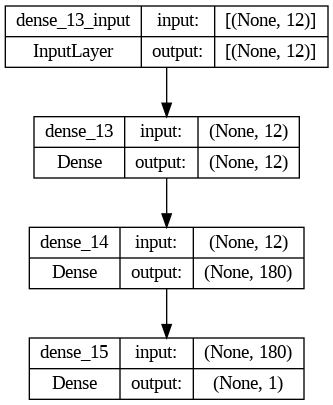

In [144]:
tf.keras.utils.plot_model(model_seq, show_shapes=True)

- Terdapat tiga jenis layer yang digunakan, yaitu Dense layer. Dense layer merupakan jenis layer pada neural network yang setiap neuronnya terhubung dengan semua neuron di layer sebelumnya dan setelahnya. Setiap Dense layer memiliki parameter berupa bobot (weight) dan bias yang digunakan untuk menghitung output dari setiap neuron pada layer tersebut.
- Output shape dari setiap layer menunjukkan dimensi dari tensor output yang dihasilkan oleh layer tersebut. Dalam contoh ini, output shape dari dense_13 layer adalah (None, 12), artinya tensor output memiliki dimensi (jumlah data, 12) dimana None menunjukkan jumlah data pada batch dapat berubah-ubah tergantung pada ukuran batch pada saat training atau inference. Output shape dari dense_14 layer adalah (None, 180) dan dense_15 layer adalah (None, 1).
- Total parameter pada model neural network ini adalah 2,677, dimana parameter ini merupakan jumlah dari seluruh parameter (weight dan bias) yang ada pada tiga layer tersebut. Trainable parameter menunjukkan jumlah parameter yang akan diupdate pada saat training, sedangkan non-trainable parameter adalah parameter yang telah ditentukan dan tidak akan diupdate selama training. Pada kasus ini, seluruh parameter (2,677) merupakan trainable parameter.

# -Sequential Tuning-

In [145]:
model_seq1 = Sequential()
model_seq1.add(tf.keras.layers.Dense(inp, activation='relu', input_shape=(train_tr.shape[1],),kernel_initializer='glorot_uniform',kernel_regularizer='l2'))
model_seq1.add(tf.keras.layers.BatchNormalization())
model_seq1.add(tf.keras.layers.Dense(hid, activation='relu', kernel_initializer='glorot_uniform'))
model_seq1.add(tf.keras.layers.Dropout(0.1))
model_seq1.add(tf.keras.layers.Dense(out, activation='sigmoid'))

model_seq1.compile(loss='binary_crossentropy', optimizer='Adam', metrics= ['accuracy'])

model_seq1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_4 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 180)               2340      
                                                                 
 dropout_2 (Dropout)         (None, 180)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                 181       
                                                                 
Total params: 2,725
Trainable params: 2,701
Non-trainable params: 24
___________________________________________________

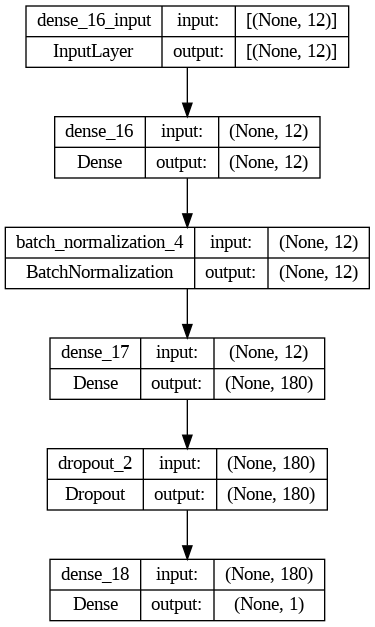

In [146]:
tf.keras.utils.plot_model(model_seq1, show_shapes=True)

- Pada model di atas, terdapat tiga layer Dense yaitu dense_16, dense_17, dan dense_18, masing-masing dengan output shape yang berbeda. Terdapat juga layer BatchNormalization yang dilabeli batch_normalization_4 dan layer Dropout yang dilabeli dengan dropout_2. Layer-layer tersebut memiliki parameter-parameter yang berbeda, sehingga total params pada model tersebut adalah 2,725.
- Trainable params adalah jumlah parameter yang dapat diubah selama proses training model (2.701), sedangkan non-trainable params adalah jumlah parameter yang tetap dan tidak berubah selama proses training model (24).

# -Functional-

In [147]:
input_layer = Input(shape=(inp,))
h1_layer = Dense(inp, activation='relu')(input_layer)
h2_layer = Dense(hid, activation='relu')(h1_layer)
output_layer = Dense(out, activation='sigmoid')(h2_layer)

model_func = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func.compile(loss='binary_crossentropy', optimizer='Adam', metrics= ['accuracy'])

model_func.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_19 (Dense)            (None, 12)                156       
                                                                 
 dense_20 (Dense)            (None, 180)               2340      
                                                                 
 dense_21 (Dense)            (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


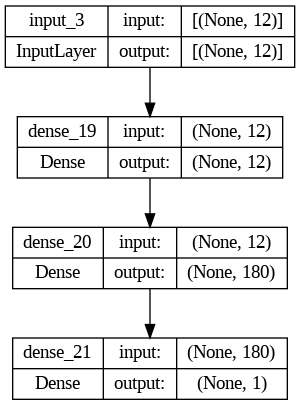

In [148]:
tf.keras.utils.plot_model(model_func, show_shapes=True)

- Hasil di atas merupakan ringkasan arsitektur model neural network yang terdiri dari tiga lapisan, yaitu input, hidden, dan output. Input terdiri dari Input Layer dengan bentuk masukan (None, 12), yang artinya model ini dapat menerima inputan berupa matriks dimana nilainya dapat bervariasi. Hidden terdiri dari Dense Layer dengan output shape (None, 12) dan 156 parameter yang dapat diatur (trainable params). Lapisan kedua juga merupakan hidden layer dengan output shape (None, 180) dan 2,340 parameter yang dapat diatur (trainable params). Lapisan terakhir adalah lapisan output dengan output shape (None, 1) dan 181 parameter yang dapat diatur (trainable params). Total parameter yang dapat diatur (trainable params) pada model ini adalah 2,677.

# -Functional Tuning-

In [149]:
input_layer = tf.keras.layers.Input(shape=(train_tr.shape[1],))
layers1 = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_layer)
layers2 = tf.keras.layers.BatchNormalization()(layers1)
layers3 = tf.keras.layers.Dense(hid, activation='relu', kernel_initializer='HeNormal')(layers2)
layers4 = tf.keras.layers.BatchNormalization()(layers3)
layers5 = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='HeNormal')(layers4)
layers6 = tf.keras.layers.BatchNormalization()(layers5)
layers7 = tf.keras.layers.Dropout(0.1)(layers6)
output = tf.keras.layers.Dense(out, activation='sigmoid', kernel_initializer='HeNormal')(layers7)

model_func_tune = tf.keras.models.Model(inputs=input_layer,outputs=output)

# Compile
model_func_tune.compile(loss='binary_crossentropy', optimizer='Adam', metrics= ['accuracy'])

model_func_tune.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_22 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_5 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_23 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_6 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_24 (Dense)            (None, 50)                9050

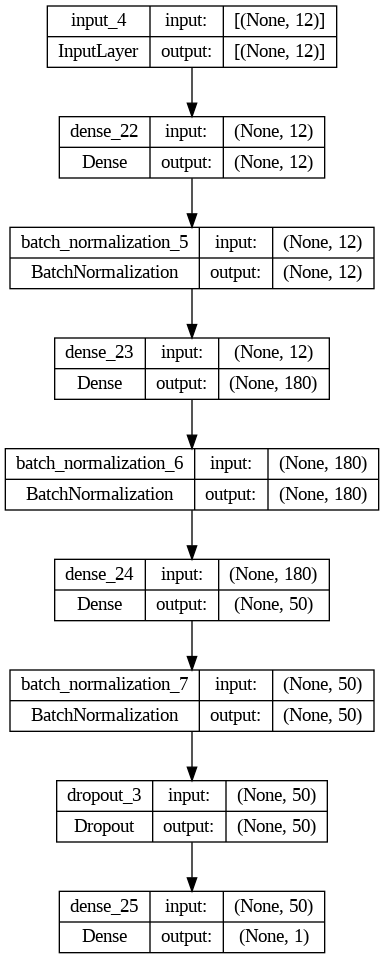

In [150]:
tf.keras.utils.plot_model(model_func_tune, show_shapes=True)

- Input layer terdiri dari 12 neurons, yang mengambil input dari dataset dengan dimensi 12. Kemudian terdapat layer Dense dengan 12 neurons, yang dihubungkan ke input layer dan menghasilkan 156 parameter.
- Selanjutnya, terdapat layer BatchNormalization, yang mengambil input dari layer Dense sebelumnya dan menghasilkan output dengan dimensi yang sama, yaitu 12. Layer BatchNormalization ini memiliki 48 parameter.
- Kemudian, terdapat layer Dense lagi dengan 180 neurons, yang mengambil input dari layer BatchNormalization dan menghasilkan 2340 parameter. Setelah itu, terdapat layer BatchNormalization lagi dengan 180 parameter.
- Selanjutnya, terdapat layer Dense lagi dengan 50 neurons, yang mengambil input dari layer BatchNormalization sebelumnya dan menghasilkan 9050 parameter. Layer ini diikuti oleh layer BatchNormalization dengan 200 parameter dan layer Dropout dengan nilai dropout 0.1.
- Akhirnya, terdapat layer Dense dengan 1 neuron, yang mengambil input dari layer Dropout sebelumnya dan menghasilkan 51 parameter. 
- Total parameter dari model ini adalah 12,565, dengan 12,081 parameter yang dapat dilatih dan 484 parameter yang tidak dapat dilatih.

# VII. Model Training

# -Sequential-

In [151]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True)]

In [152]:
%%time
history_seq_def = model_seq.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks)

Epoch 1/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.3021 - accuracy: 0.8403 - val_loss: 0.2690 - val_accuracy: 0.8535
Epoch 2/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.2748 - accuracy: 0.8494 - val_loss: 0.2582 - val_accuracy: 0.8675
Epoch 3/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.2620 - accuracy: 0.8638 - val_loss: 0.2467 - val_accuracy: 0.8724
Epoch 4/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2520 - accuracy: 0.8819 - val_loss: 0.2392 - val_accuracy: 0.8863
Epoch 5/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2444 - accuracy: 0.8964 - val_loss: 0.2316 - val_accuracy: 0.9006
Epoch 6/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.2370 - accuracy: 0.9097 - val_loss: 0.2247 - val_accuracy: 0.9112
Epoch 7/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2299 - accuracy: 0.9172 - val_loss: 0.2186 - val_accuracy:

- Dari hasil di atas, dapat disimpulkan bahwa model telah melalui 50 dari 50 epochs (iterasi melalui seluruh data training), dengan akurasi 93.38% pada data training dan akurasi 93.20% pada data validasi. 
- Selain itu, ditemukan bahwa loss pada data training adalah 0.1569 dan loss pada data validasi adalah 0.1600. 
- Waktu yang dibutuhkan untuk melatih model adalah sekitar 3 menit 53 detik pada sistem yang digunakan. 
- Dalam hal ini, epoch berarti satu kali iterasi melalui seluruh data training, sedangkan callbacks adalah mekanisme untuk melakukan tindakan tertentu selama proses pelatihan, seperti penghentian awal jika tidak ada peningkatan kinerja dalam beberapa epoch.

# -Sequential Tuning-

In [153]:
%%time
history_seq_tune = model_seq1.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks)

Epoch 1/50
1101/1101 [==============================] - 7s 5ms/step - loss: 0.3264 - accuracy: 0.8542 - val_loss: 0.2708 - val_accuracy: 0.8549
Epoch 2/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.2638 - accuracy: 0.8806 - val_loss: 0.2672 - val_accuracy: 0.8520
Epoch 3/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.2491 - accuracy: 0.8970 - val_loss: 0.2407 - val_accuracy: 0.8820
Epoch 4/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.2288 - accuracy: 0.9103 - val_loss: 0.2122 - val_accuracy: 0.9094
Epoch 5/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.2134 - accuracy: 0.9144 - val_loss: 0.2083 - val_accuracy: 0.9110
Epoch 6/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.2056 - accuracy: 0.9152 - val_loss: 0.1926 - val_accuracy: 0.9221
Epoch 7/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.2021 - accuracy: 0.9161 - val_loss: 0.1884 - val_accuracy:

- Dari hasil di atas, dapat disimpulkan bahwa model telah melalui 11 dari 50 epochs (iterasi melalui seluruh data training), dengan akurasi 91.83% pada data training dan akurasi 91.98% pada data validasi. 
- Selain itu, ditemukan bahwa loss pada data training adalah 0.1941 dan loss pada data validasi adalah 0.1935. 
- Waktu yang dibutuhkan untuk melatih model adalah sekitar 1 menit 8 detik pada sistem yang digunakan. 
- Model ini merupakan model yang telah dilakukan tuning pada beberapa parameter, sehingga dapat menghasilkan akurasi yang lebih baik dibandingkan dengan model sebelumnya.

# -Functional-

In [154]:
%%time
history_func_def = model_func.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks)

Epoch 1/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.3055 - accuracy: 0.8391 - val_loss: 0.2668 - val_accuracy: 0.8525
Epoch 2/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2743 - accuracy: 0.8473 - val_loss: 0.2580 - val_accuracy: 0.8540
Epoch 3/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2640 - accuracy: 0.8517 - val_loss: 0.2501 - val_accuracy: 0.8750
Epoch 4/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2557 - accuracy: 0.8655 - val_loss: 0.2463 - val_accuracy: 0.8539
Epoch 5/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2519 - accuracy: 0.8748 - val_loss: 0.2443 - val_accuracy: 0.8537
Epoch 6/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.2497 - accuracy: 0.8807 - val_loss: 0.2428 - val_accuracy: 0.8544
Epoch 7/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2478 - accuracy: 0.8872 - val_loss: 0.2411 - val_accuracy:

- Dari hasil di atas, dapat disimpulkan bahwa model telah melalui 47 epochs (iterasi melalui seluruh data training), dengan akurasi 93.33% pada data training dan akurasi 93.26% pada data validasi. 
- Selain itu, ditemukan bahwa loss pada data training adalah 0.1541 dan loss pada data validasi adalah 0.1548. Waktu yang dibutuhkan untuk melatih model adalah sekitar 3 menit 18 detik pada sistem yang digunakan. 
- Model ini menggunakan pendekatan Functional API dan telah melalui 47 epochs tanpa dilakukan tuning parameter. Dari hasil tersebut, dapat dikatakan bahwa model mampu memberikan akurasi yang baik pada data training dan validasi.

# -Functional Tuning-

In [155]:
%%time
history_func_tune = model_func_tune.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks)

Epoch 1/50
1101/1101 [==============================] - 10s 5ms/step - loss: 0.3508 - accuracy: 0.8659 - val_loss: 0.2724 - val_accuracy: 0.8741
Epoch 2/50
1101/1101 [==============================] - 6s 5ms/step - loss: 0.2580 - accuracy: 0.8967 - val_loss: 0.2328 - val_accuracy: 0.9008
Epoch 3/50
1101/1101 [==============================] - 5s 4ms/step - loss: 0.2289 - accuracy: 0.9115 - val_loss: 0.2096 - val_accuracy: 0.9190
Epoch 4/50
1101/1101 [==============================] - 6s 6ms/step - loss: 0.2114 - accuracy: 0.9189 - val_loss: 0.1915 - val_accuracy: 0.9224
Epoch 5/50
1101/1101 [==============================] - 5s 4ms/step - loss: 0.2015 - accuracy: 0.9225 - val_loss: 0.1922 - val_accuracy: 0.9229
Epoch 6/50
1101/1101 [==============================] - 6s 6ms/step - loss: 0.1943 - accuracy: 0.9244 - val_loss: 0.1861 - val_accuracy: 0.9267
Epoch 7/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.1891 - accuracy: 0.9258 - val_loss: 0.1939 - val_accuracy

- Dari hasil di atas, dapat disimpulkan bahwa model telah melalui 11 epochs (iterasi melalui seluruh data training), dengan akurasi 93.00% pada data training dan akurasi 92.48% pada data validasi. 
- Selain itu, ditemukan bahwa loss pada data training adalah 0.1802 dan loss pada data validasi adalah 0.1865. 
- Waktu yang dibutuhkan untuk melatih model adalah sekitar 1 menit 22 detik pada sistem yang digunakan.
- Model ini menggunakan pendekatan Functional API dan telah melalui 11 epochs setelah dilakukan tuning parameter. Dari hasil tersebut, dapat dikatakan bahwa model mampu memberikan akurasi yang baik pada data training dan validasi, meskipun perbedaan akurasinya dengan model yang belum dilakukan tuning parameter tidak signifikan.

# VIII. Model Evaluation

# -Sequential-

In [156]:
history_seq_def_df = pd.DataFrame(history_seq_def.history)

<Axes: >

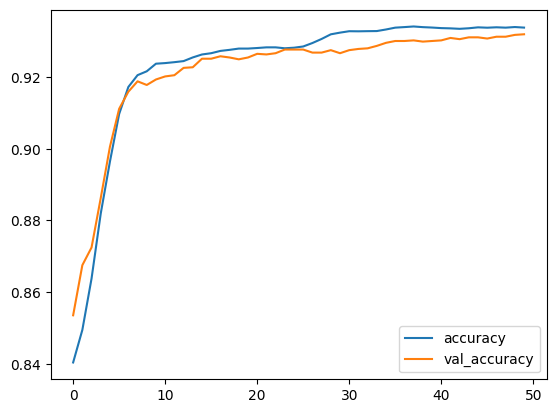

In [157]:
history_seq_def_df[['accuracy', 'val_accuracy']].plot()

- Garis pada data validasi dan data train tidak mengalami kenaikan atau penurunan, maka model dianggap goodfitting. Jika model sudah good fit, artinya model tersebut sudah berhasil mempelajari pola yang ada pada data training dengan baik, sehingga model dapat memberikan prediksi yang akurat pada data yang belum pernah dilihat sebelumnya (testing data).

<Axes: >

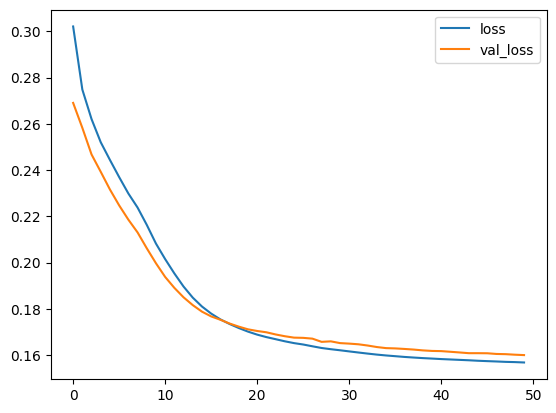

In [158]:
history_seq_def_df[['loss', 'val_loss']].plot()

- Hasil dari plot tersebut menunjukkan garis loss train dan loss val datar, itu berarti model telah mengalami overfitting, di mana model secara efektif mempelajari data training dengan sangat baik tetapi tidak dapat menggeneralisasi pada data validasi yang belum pernah dilihat sebelumnya. 

In [159]:
y_pred_seq_def = model_seq.predict(test_tr)
y_pred_seq_def = np.where(y_pred_seq_def >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_def))

230/230 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3364
           1       0.94      0.93      0.93      3966

    accuracy                           0.93      7330
   macro avg       0.92      0.93      0.92      7330
weighted avg       0.93      0.93      0.93      7330



Text(95.72222222222221, 0.5, 'Truth')

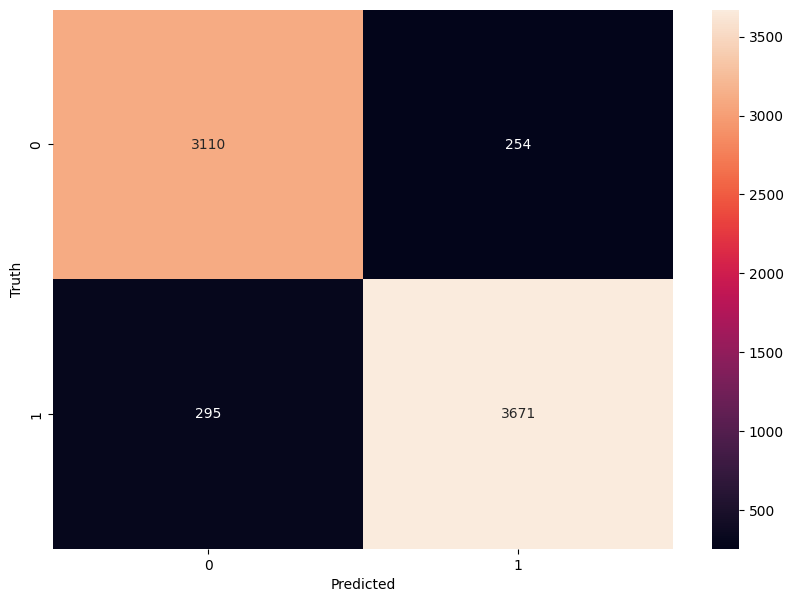

In [160]:
cm_seq_def = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_def)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq_def, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

- Hasil tersebut menunjukkan evaluasi performa dari model yang digunakan pada data uji. Dapat dilihat bahwa model memiliki akurasi sebesar 0.93, yang artinya model berhasil memprediksi dengan benar sebanyak 93% pada data uji. Selain itu, nilai precision dan recall untuk kelas 0 dan 1 juga tergolong tinggi, yang menunjukkan bahwa model berhasil mengklasifikasikan dengan baik kedua kelas tersebut. 
- Namun, terdapat beberapa sampel yang salah diklasifikasikan oleh model, seperti 254 sampel yang seharusnya masuk ke kelas 0 namun diprediksi sebagai kelas 1, dan 295 sampel yang seharusnya masuk ke kelas 1 namun diprediksi sebagai kelas 0.

# -Sequential Tuning-

In [161]:
history_seq_tune_df = pd.DataFrame(history_seq_tune.history)

<Axes: >

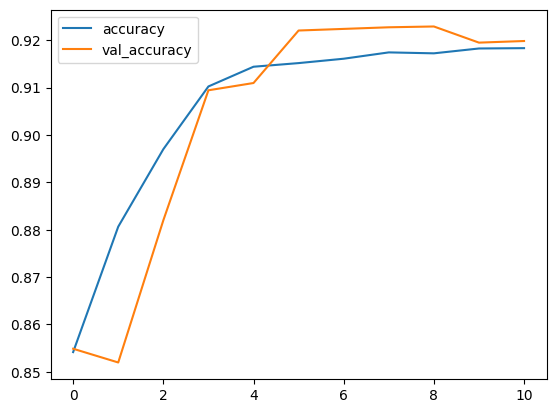

In [162]:
history_seq_tune_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

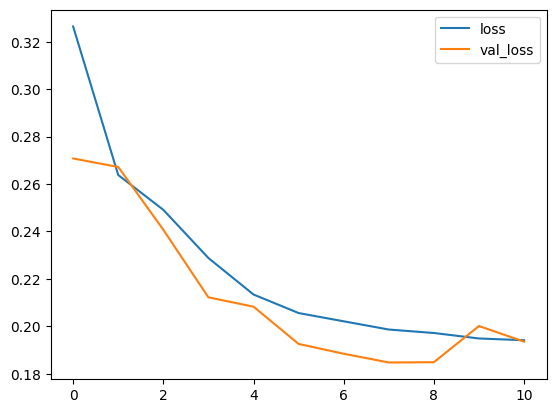

In [163]:
history_seq_tune_df[['loss', 'val_loss']].plot()

In [164]:
y_pred_seq_tune = model_seq1.predict(test_tr)
y_pred_seq_tune = np.where(y_pred_seq_tune >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_tune))

230/230 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3364
           1       0.93      0.92      0.92      3966

    accuracy                           0.92      7330
   macro avg       0.92      0.92      0.92      7330
weighted avg       0.92      0.92      0.92      7330



Text(95.72222222222221, 0.5, 'Truth')

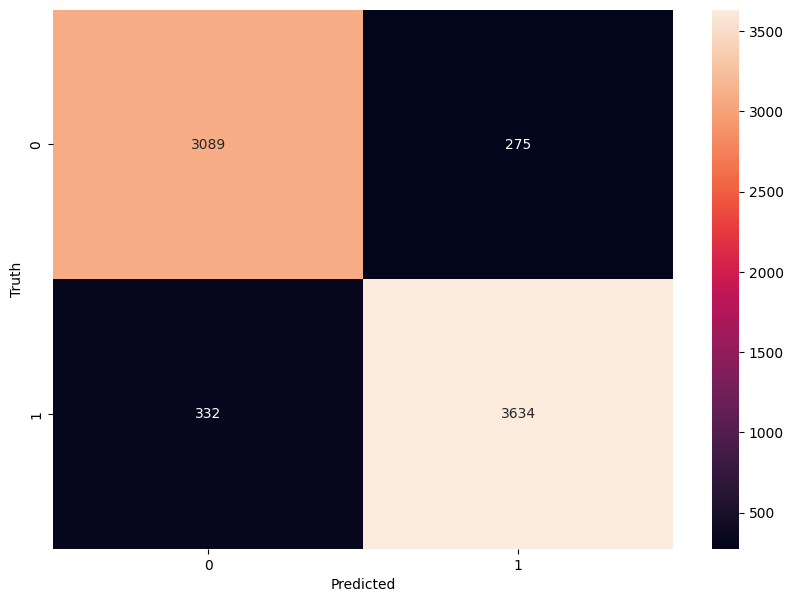

In [165]:
cm_seq_tune = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_tune)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq_tune, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

- Dari hasil evaluasi, diketahui bahwa nilai akurasi (accuracy) pada model adalah sebesar 0.92 atau 92%. Hal ini berarti model berhasil mengklasifikasikan 92% dari total data uji dengan benar, yang dapat dianggap sebagai hasil yang cukup baik. 
- Dari hasil tersebut, dapat disimpulkan bahwa model memiliki performa yang baik dalam memprediksi kelas 0 dan 1 dengan precision dan recall yang tinggi. Namun, terdapat sedikit penurunan performa pada precision kelas 0 dan recall kelas 1 dibandingkan dengan hasil sebelumnya. Hal ini dapat disebabkan oleh faktor-faktor seperti perbedaan dataset uji yang digunakan, atau variabilitas acak dalam pelatihan dan evaluasi model.

# -Functional- 

In [166]:
history_func_def_df = pd.DataFrame(history_func_def.history)

<Axes: >

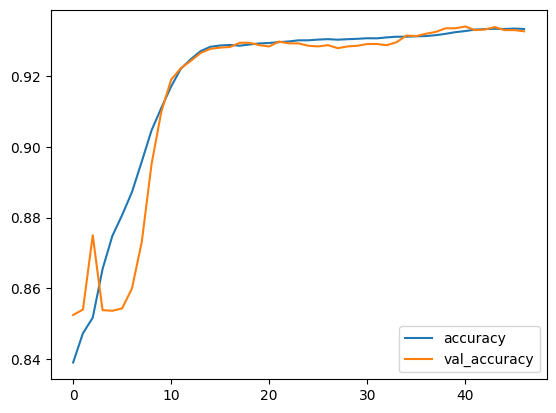

In [167]:
history_func_def_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

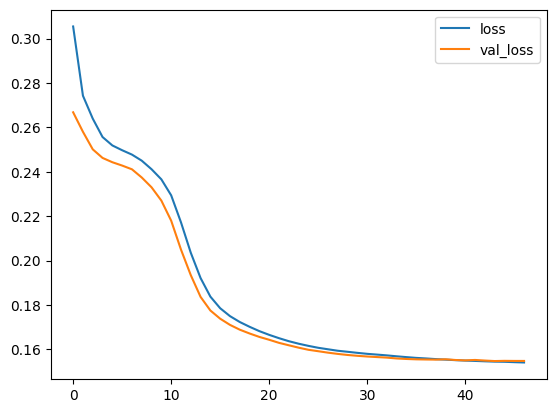

In [168]:
history_func_def_df[['loss', 'val_loss']].plot()

In [169]:
y_pred_func_def = model_func.predict(test_tr)
y_pred_func_def = np.where(y_pred_func_def >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_def))

230/230 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3364
           1       0.93      0.94      0.93      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(95.72222222222221, 0.5, 'Truth')

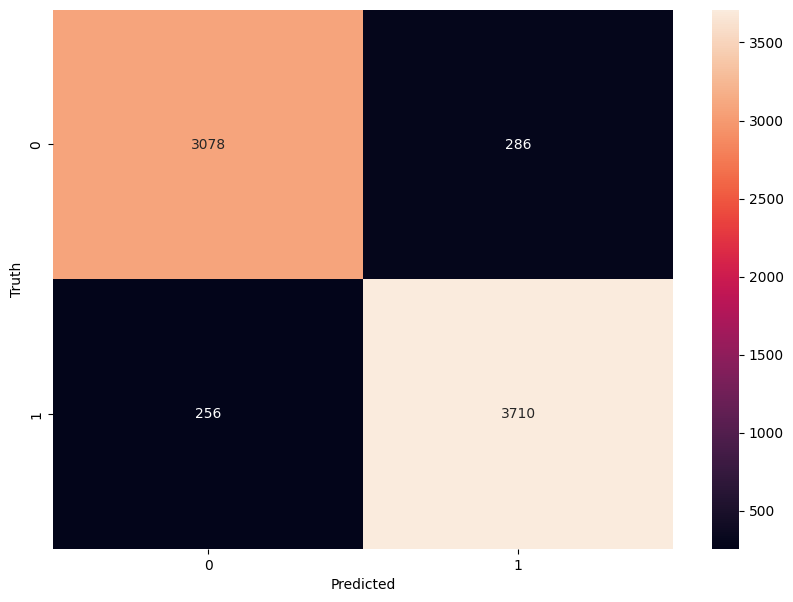

In [170]:
cm_func_def = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_def)
plt.figure(figsize = (10,7))
sns.heatmap(cm_func_def, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

- Dari hasil tersebut, dapat dilihat bahwa model memiliki akurasi sebesar 0.93 atau 93%. Hal ini berarti model berhasil mengklasifikasikan 93% data dengan benar. Selain itu, dapat dilihat dari nilai precision, recall, dan f1-score untuk kelas 0 dan 1, bahwa model memiliki kinerja yang baik dalam mengklasifikasikan kedua kelas. 
- Namun, perlu diperhatikan bahwa terdapat perbedaan pada nilai precision, recall, dan f1-score antara kelas 0 dan 1, dimana kelas 0 memiliki recall yang lebih rendah dibandingkan precision, sedangkan kelas 1 memiliki recall yang lebih tinggi dibandingkan precision. 
- Dari pernyataan tersebut, dapat disimpulkan bahwa model lebih baik dalam memprediksi kelas 1 (customer yang akan churn) daripada kelas 0 (customer yang tidak akan churn). Oleh karena itu, untuk meminimalkan kerugian akibat kehilangan pelanggan, perlu dilakukan upaya yang lebih intensif untuk mempertahankan pelanggan yang termasuk dalam kelas 0, seperti memberikan penawaran khusus atau memberikan layanan yang lebih baik untuk meningkatkan kepuasan pelanggan. Selain itu, perlu juga dilakukan evaluasi lebih lanjut terhadap model untuk memperbaiki performa model dalam memprediksi kelas 0.




# -Functional Tuning-

In [171]:
history_func_tune_df = pd.DataFrame(history_func_tune.history)

<Axes: >

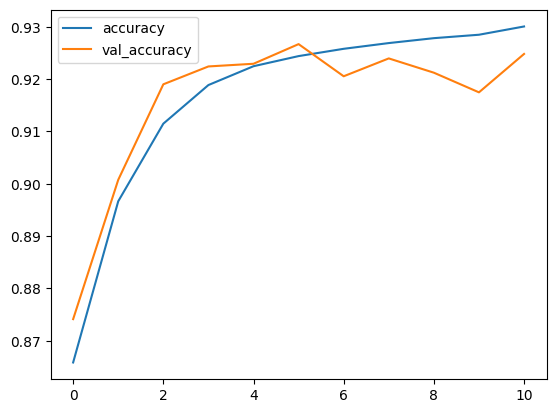

In [172]:
history_func_tune_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

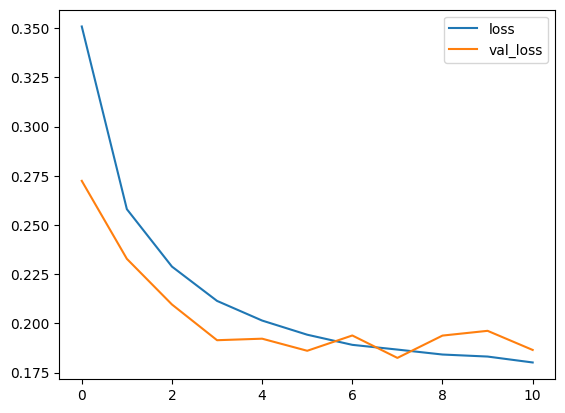

In [173]:
history_func_tune_df[['loss', 'val_loss']].plot()

In [174]:
y_pred_func_tune = model_func_tune.predict(test_tr)
y_pred_func_tune = np.where(y_pred_func_tune >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_tune))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3364
           1       0.94      0.91      0.92      3966

    accuracy                           0.92      7330
   macro avg       0.92      0.92      0.92      7330
weighted avg       0.92      0.92      0.92      7330



Text(95.72222222222221, 0.5, 'Truth')

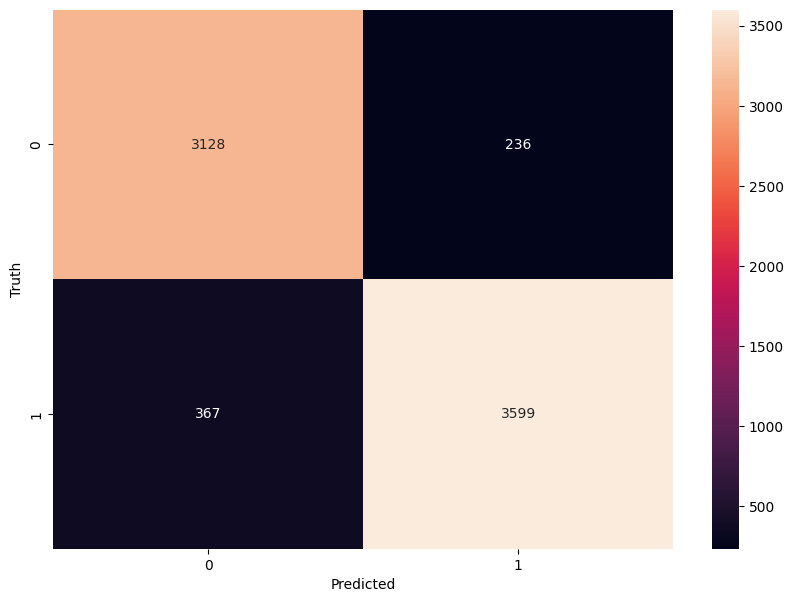

In [175]:
cm_func_tune = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_tune)
plt.figure(figsize = (10,7))
sns.heatmap(cm_func_tune, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

- Dari hasil tersebut dapat disimpulkan bahwa model memiliki akurasi sebesar 0.92 atau 92%. Precision dan recall untuk kedua kelas (0 dan 1) juga cukup baik, dengan nilai precision dan recall di atas 0.89 dan 0.91 masing-masing.

# IX. Model Saving

In [176]:
# Save model
with open('full_pipeline.pkl', 'wb') as file_1:
  joblib.dump(full_pipeline, file_1)

In [177]:
model_func_tune.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_22 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_5 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_23 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_6 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_24 (Dense)            (None, 50)                9050

In [178]:
# Freeze Model
model_func_tune.trainable = False
model_func_tune.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_22 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_5 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_23 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_6 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_24 (Dense)            (None, 50)                9050

In [180]:
# Save ANN model Functional Tuning
model_func.save('churn_model.h5')

- Model Functional dipilih karena nilai akurasi nya tinggi dan prediksi untuk kelas 1 lebih sedikit kesalahannya daripada model Sequensial

# X. Kesimpulan

Berdasarkan EDA yang telah dilakukan dapat disimpulkan bahwa :
- Jumlah data untuk nilai churn_risk_score 1 terdapat sebanyak 19833, sedangkan untuk nilai 0 terdapat sebanyak 16831. Hal ini menunjukkan bahwa lebih banyak pelanggan yang memiliki nilai churn_risk_score 1 dibandingkan dengan pelanggan yang memiliki nilai churn_risk_score 0.
- Secara umum, nilai churn_risk_score yang tinggi (1) menunjukkan bahwa pelanggan memiliki risiko yang lebih tinggi untuk berhenti berlangganan layanan, sedangkan nilai churn_risk_score yang rendah (0) menunjukkan bahwa pelanggan memiliki risiko yang lebih rendah untuk berhenti berlangganan.
- Berdasarkan hasil grafik dapat disimpulkan bahwa: Skor risiko customer churn (1) mewakili mayoritas dataset, dengan persentase sebesar 54%. Sedangkan untuk skor risiko customer yang tidak churn (0) mewakili minoritas dataset, dengan persentase sebesar 46%.
- Hal ini menunjukkan bahwa proporsi pelanggan yang lebih tinggi yang berisiko churn dibandingkan dengan yang tidak. Penting bagi bisnis untuk mengidentifikasi dan memahami faktor-faktor yang berkontribusi terhadap skor risiko churn yang lebih tinggi untuk mengembangkan strategi yang efektif untuk mempertahankan pelanggan dan mengurangi churn.

- Dalam analisis ini, saya melakukan studi hubungan antara target dan fitur untuk memprediksi kemungkinan churn pelanggan. Algoritma model yang saya gunakan yaitu Artificial Neural Network sebagai model prediksi dan membangun model dengan menggunakan Sequential API dan Functional API. Metrik evaluasi yang digunakan untuk mengevaluasi kinerja model adalah akurasi, presisi, recall, dan F1-score. Hasil pengujian model menunjukkan bahwa model kami dapat memprediksi churn dan tidak churn dengan akurasi yang baik. Namun, faktor-faktor juga dapat mempengaruhi churn pelanggan dan perlu dipertimbangkan dalam pengembangan model. Dengan pendekatan analitik ini, kami dapat menghasilkan model yang dapat membantu perusahaan untuk memperkirakan kemungkinan churn pelanggan dan mengambil tindakan yang sesuai untuk mengurangi churn.

- Berdasarkan hasil dari analisis model menggunakan arsitektur ANN dengan Sequensial dan Funcional didapat hasil bahwa baik model Sequensial dan Funcional yang tidak dilakukan hyperparameter tuning memiliki performa yang lebih baik dari yang dilakukan tuning. Usaha yang dilakukan untuk meningkatkan performa model yang di tuning yaitu sudah melakukan penggantian berulang" baik pada kernel_initializer (random_uniform, glorot_uniform dan he_normal) , optimizer (adam, nadam, RMSprop), menambah jumlah layer, dan mengganti matric hasilnya tetap sama baik yang Sequensial atau Funcional yang tidak dilakukan tuning performanya lebih baik.

- Dapat disimpulkan juga bahwa model kurang baik dalam memprediksi kelas 1 (customer yang akan churn) daripada kelas 0 (customer yang tidak akan churn). Oleh karena itu, untuk meminimalkan kerugian akibat kehilangan pelanggan, perlu dilakukan upaya yang lebih intensif untuk mempertahankan pelanggan yang termasuk dalam kelas 0, seperti memberikan penawaran khusus atau memberikan layanan yang lebih baik untuk meningkatkan kepuasan pelanggan. Selain itu, perlu juga dilakukan evaluasi lebih lanjut terhadap model untuk memperbaiki performa model dalam memprediksi kelas 0.